In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Code to Load and Explore the Data:

In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/vaccination-us-covid/us_state_vaccinations.csv'
df = pd.read_csv(file_path)

# Quick exploration
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54628 entries, 0 to 54627
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 54628 non-null  object 
 1   location                             54628 non-null  object 
 2   total_vaccinations                   32532 non-null  float64
 3   total_distributed                    32272 non-null  float64
 4   people_vaccinated                    32268 non-null  float64
 5   people_fully_vaccinated_per_hundred  30651 non-null  float64
 6   total_vaccinations_per_hundred       30750 non-null  float64
 7   people_fully_vaccinated              32188 non-null  float64
 8   people_vaccinated_per_hundred        30726 non-null  float64
 9   distributed_per_hundred              30730 non-null  float64
 10  daily_vaccinations_raw               28354 non-null  float64
 11  daily_vaccinations          

# Step 2: Add a Column for State Political Leaning

Creating Red states and Blue states based on previous election trend

In [3]:
# Define red and blue states based on 2020 election results
red_states = ['Alabama', 'Alaska', 'Arkansas', 'Florida', 'Idaho', 'Kansas', 'Kentucky', 'Louisiana', 
              'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'North Dakota', 'Oklahoma', 
              'South Carolina', 'South Dakota', 'Ohio', 'Iowa', 'Indiana', 'Pennsylvania', 'Wisconsin', 
              'Michigan', 'North Carolina', 'Arizona', 'Georgia','Tennessee', 'Texas', 'Utah', 'West Virginia', 'Wyoming']
blue_states = ['California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Maine', 
               'Maryland', 'Massachusetts', 'Minnesota', 'Nevada', 'New Hampshire', 'New Jersey', 'Delaware','Hawaii',
               'New Mexico', 'New York', 'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington']

# Add a political leaning column
df['political_leaning'] = df['location'].apply(lambda x: 'Red' if x in red_states else 'Blue' if x in blue_states else 'Other')

# Verify the column
print(df['political_leaning'].value_counts())


political_leaning
Red      25470
Blue     16131
Other    13027
Name: count, dtype: int64


# Step 3: Formulate the Hypothesis
Null Hypothesis (H₀): There is no significant difference in vaccination rates per person between red and blue states.
Alternative Hypothesis (H₁): Vaccination rates per person are significantly lower in red states compared to blue states.

# Step 4: Statistical Testing
We’ll use a t-test or a Mann-Whitney U test to compare the vaccination rates between red and blue states.

**Preparation:**
Focus on the relevant columns:

people_vaccinated_per_hundred: Number of people vaccinated per 100.
political_leaning: The column we just added.

In [4]:
from scipy.stats import ttest_ind

# Separate vaccination rates by political leaning
red_vax_rates = df[df['political_leaning'] == 'Red']['people_vaccinated_per_hundred'].dropna()
blue_vax_rates = df[df['political_leaning'] == 'Blue']['people_vaccinated_per_hundred'].dropna()

# Perform a t-test
stat, p_value = ttest_ind(red_vax_rates, blue_vax_rates, equal_var=False)
print(f"T-test Statistic: {stat}, p-value: {p_value}")


T-test Statistic: -42.19447964719196, p-value: 0.0


# Interpreting Your T-Test Results
**T-test Statistic: -42.19**

A large absolute value of the t-statistic (positive or negative) indicates a strong difference between the means of the two groups.
The negative sign simply indicates the direction of the difference (e.g., red states have lower vaccination rates than blue states).

**p-value: 0.0**

A p-value of 0.0 means the difference is statistically significant at any reasonable significance level (e.g., 0.05 or 0.01).
You can reject the null hypothesis that the vaccination rates are the same between red and blue states.

# Step 5: Data Visualization
Box Plot: Compare vaccination rates between red and blue states visually:

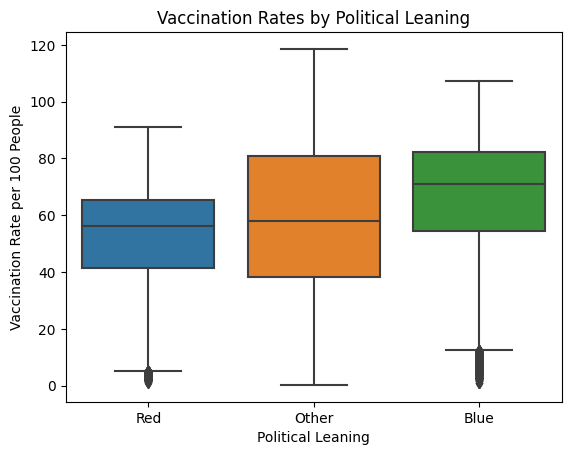

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='political_leaning', y='people_vaccinated_per_hundred')
plt.title('Vaccination Rates by Political Leaning')
plt.xlabel('Political Leaning')
plt.ylabel('Vaccination Rate per 100 People')
plt.show()


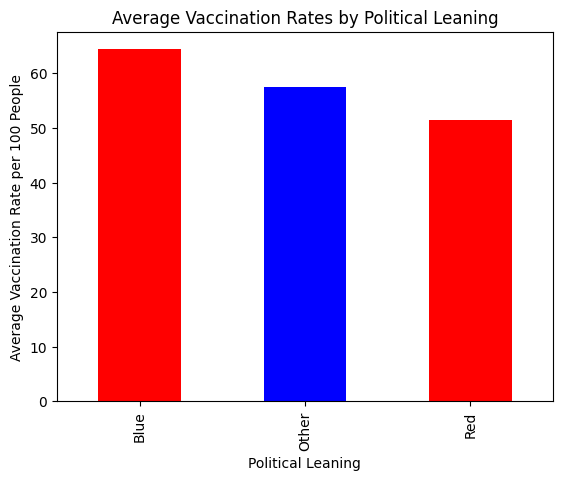

In [6]:
avg_vax_rates = df.groupby('political_leaning')['people_vaccinated_per_hundred'].mean()
avg_vax_rates.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Vaccination Rates by Political Leaning')
plt.ylabel('Average Vaccination Rate per 100 People')
plt.xlabel('Political Leaning')
plt.show()


From the statistics, it can confidently be concluded that blue states have higher vaccination rates per 100 people compared to red states, supported by your statistical test and the nearly 10-point difference in the averages.